# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Check Out The Data

In [2]:
md = pd.read_csv('meningitis_dataset.csv')

In [3]:
md.head()

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [4]:
new_cols = {'gender':'sex', 'gender_male':'sex_ml'}

md.rename(columns = new_cols, inplace = True)

In [5]:
md['sex'].value_counts()

Female    147272
Male      137212
Name: sex, dtype: int64

In [6]:
new_col = {'rural_settlement':'settlement_ml'}

md.rename(columns = new_col, inplace = True)

In [7]:
Child_group = []
for row in md.child_group:
    if row == 0:
        row = 'Adult'
    else:
        row = 'Child'


    Child_group.append(row)   
    
md['child_group'] = Child_group

In [8]:
md.head()

,id,surname,firstname,middlename,sex,sex_ml,gender_female,state,settlement,settlement_ml,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [9]:
md['settlement'].value_counts()

Rural    142563
Urban    141921
Name: settlement, dtype: int64

In [10]:
md.tail()

,id,surname,firstname,middlename,sex,sex_ml,gender_female,state,settlement,settlement_ml,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,1,Cross River,Rural,1,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,1,Kwara,Urban,0,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284481,288420,Isa,Deborah,Tofunmi,Female,0,1,Katsina,Rural,1,...,0,0,1,Alive,1,0,Confirmed,0,1,1
284482,288421,Uba,Ismail,Akpabio,Male,1,0,Jigawa,Rural,1,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
284483,288422,Alao,Paulina,Sade,Female,0,1,Kogi,Urban,0,...,0,0,1,Alive,1,0,Confirmed,0,1,1


In [11]:
md.isnull().sum()

id                            0
surname                       0
firstname                     0
middlename                    0
sex                           0
sex_ml                        0
gender_female                 0
state                         0
settlement                    0
settlement_ml                 0
urban_settlement              0
report_date                   0
report_year                   0
age                           0
age_str                       0
date_of_birth                 0
child_group                   0
adult_group                   0
disease                       0
cholera                       0
diarrhoea                     0
measles                       0
viral_haemmorrhaphic_fever    0
meningitis                    0
ebola                         0
marburg_virus                 0
yellow_fever                  0
rubella_mars                  0
malaria                       0
serotype                      0
NmA                           0
NmC     

In [12]:
md.describe()

,id,sex_ml,gender_female,settlement_ml,urban_settlement,report_year,age,adult_group,cholera,diarrhoea,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
count,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,...,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000
mean,144727.037932,0.482319,0.517681,0.501128,0.498872,2013.503097,34.732396,0.708293,0.100494,0.100357,...,0.100318,0.100304,0.024740,0.025063,0.950194,0.499835,0.500165,0.749691,0.250309,0.900304
std,83406.850454,0.499688,0.499688,0.500000,0.500000,2.871560,22.240912,0.454549,0.300658,0.300476,...,0.300425,0.300406,0.155331,0.156317,0.217544,0.500001,0.500001,0.433192,0.433192,0.299595
min,1.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72441.750000,0.000000,0.000000,0.000000,0.000000,2011.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,144916.500000,0.000000,1.000000,1.000000,0.000000,2013.000000,34.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,217301.250000,1.000000,1.000000,1.000000,1.000000,2016.000000,54.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,288422.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,78.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 40 columns):
id                            284484 non-null int64
surname                       284484 non-null object
firstname                     284484 non-null object
middlename                    284484 non-null object
sex                           284484 non-null object
sex_ml                        284484 non-null int64
gender_female                 284484 non-null int64
state                         284484 non-null object
settlement                    284484 non-null object
settlement_ml                 284484 non-null int64
urban_settlement              284484 non-null int64
report_date                   284484 non-null object
report_year                   284484 non-null int64
age                           284484 non-null int64
age_str                       284484 non-null object
date_of_birth                 284484 non-null object
child_group                   284484 non-null ob

In [14]:
md.columns

Index(['id', 'surname', 'firstname', 'middlename', 'sex', 'sex_ml',
       'gender_female', 'state', 'settlement', 'settlement_ml',
       'urban_settlement', 'report_date', 'report_year', 'age', 'age_str',
       'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera',
       'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis',
       'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria',
       'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead',
       'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype'],
      dtype='object')

In [15]:
mg = md.drop(md[['gender_female','urban_settlement','age_str','date_of_birth','adult_group','disease','cholera','diarrhoea', 'measles', 'viral_haemmorrhaphic_fever','ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria','serotype', 'health_status','dead','report_outcome','report_date','report_year','unconfirmed','null_serotype']], axis = 1)

In [16]:
mg.head()

,id,surname,firstname,middlename,sex,sex_ml,state,settlement,settlement_ml,age,child_group,meningitis,NmA,NmC,NmW,alive,confirmed
0,1,Solade,Grace,Solape,Female,0,Rivers,Rural,1,32,Adult,0,0,0,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,Ebonyi,Rural,1,32,Adult,0,0,0,1,1,0
2,3,Sanusi,Adaugo,Katerine,Female,0,Ogun,Urban,0,24,Adult,0,0,0,1,0,0
3,4,Sowore,Mooslemat,Ifedayo,Female,0,Ondo,Rural,1,63,Adult,0,0,0,1,1,0
4,5,Abdusalam,Yusuf,Okafor,Male,1,Oyo,Urban,0,9,Child,0,0,0,1,1,0


# VISUALISATIONS

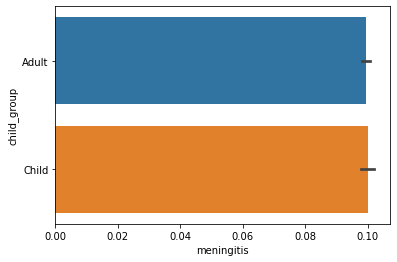

In [17]:
sns.barplot(x = 'meningitis', y = 'child_group', data = mg)

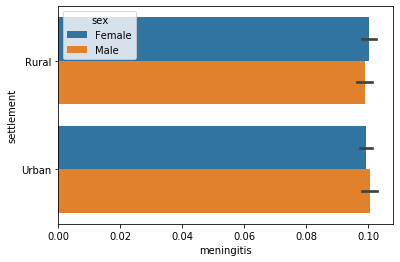

In [18]:
sns.barplot(x = 'meningitis', y = 'settlement', hue = 'sex', data = mg)

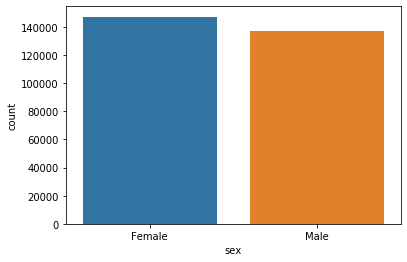

In [19]:
sns.countplot(x = 'sex', data = mg)

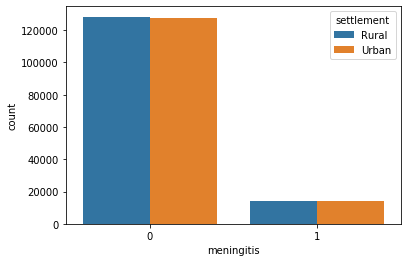

In [20]:
sns.countplot(x = 'meningitis', hue = 'settlement', data = mg)

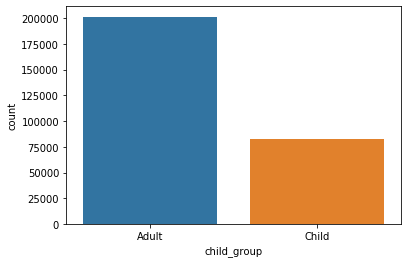

In [21]:
sns.countplot(x = 'child_group', data = mg)

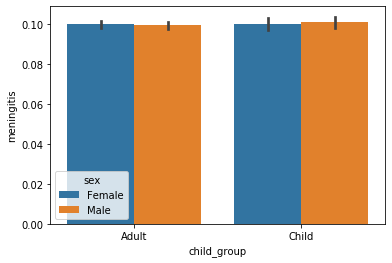

In [22]:
sns.barplot(x = 'child_group', y = 'meningitis', hue = 'sex', data = mg)

# USING A HEATMAP AND CLUSTERMAP TO CHECK FOR CORRELATIONS

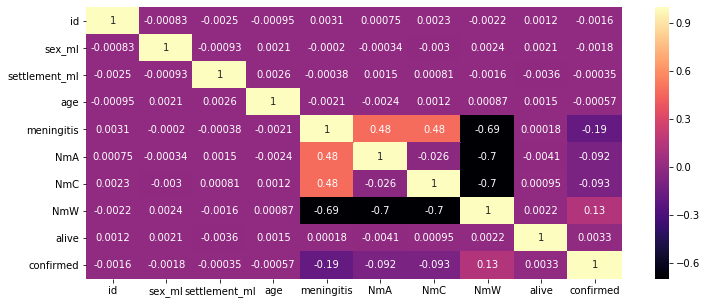

In [23]:
plt.figure(figsize = (12, 5))
sns.heatmap(mg.corr(), annot = True, cmap = 'magma')

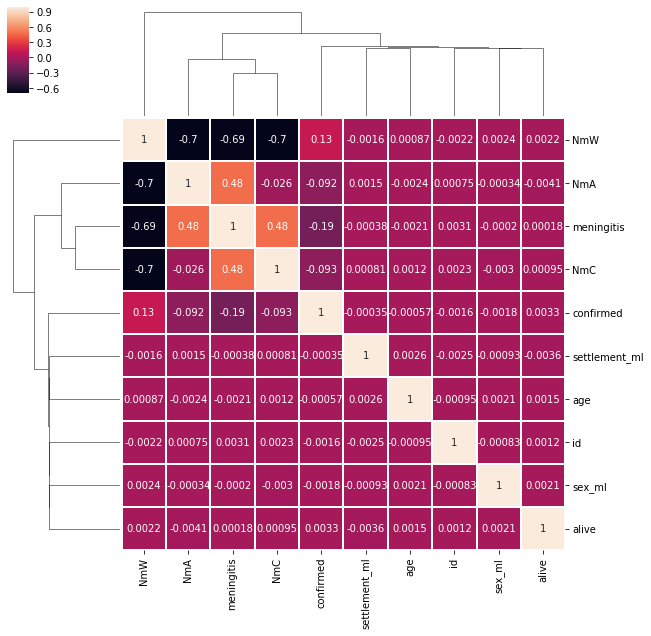

In [24]:
sns.clustermap(mg.corr(), annot = True, linecolor = 'white', lw = 1)

# CATEGORIZING THE STATES INTO REGIONS

In [25]:
region = []
for row in mg.state:
    if row == 'Edo' or row == 'Delta' or row == 'Cross River' or row == 'Akwa-Ibom' or row == 'Bayelsa' or row == 'Rivers':
        row = 'South South'
    elif row == 'Ogun' or row == 'Ondo' or row == 'Oyo' or row == 'Osun' or row == 'Ekiti' or row == 'Lagos':
        row = 'South West'
    elif row == 'Kwara' or row == 'Federal Capital Territory' or row == 'Plateau' or row == 'Nasarawa' or row == 'Kogi' or row == 'Benue' or row == 'Niger':
        row = 'North Central'
    elif row == 'Ebonyi' or row == 'Anambra' or row == 'Abia' or row == 'Enugu' or row == 'Imo':
        row = 'South East'
    elif row == 'Taraba' or row == 'Adamawa' or row == 'Borno' or row == 'Yobe' or row == 'Gombe' or row == 'Bauchi':
        row = 'North East'
    else:
        row = 'North West'


    region.append(row)   
    
mg['Region'] = region

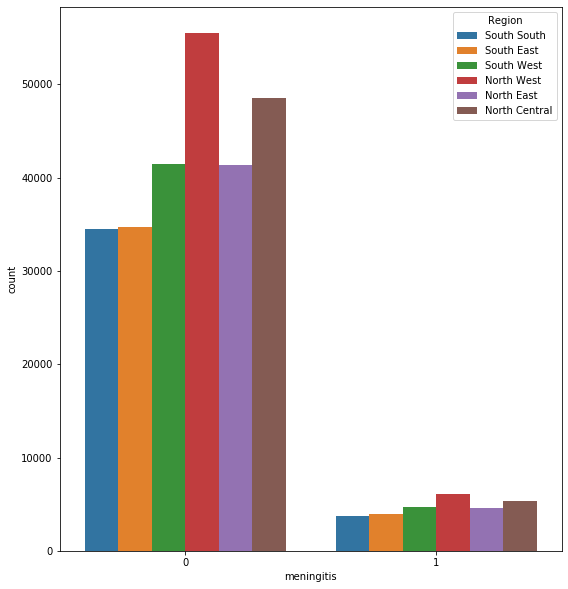

In [26]:
plt.figure(figsize = (9, 10))
sns.countplot(hue= 'Region', x= 'meningitis', data= mg)

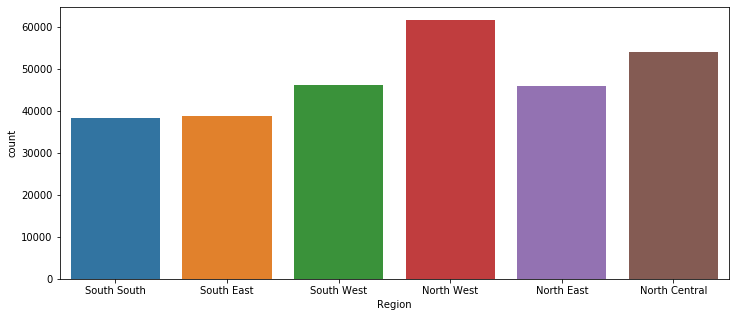

In [27]:
plt.figure(figsize = (12, 5))
sns.countplot( x= 'Region', data= mg)

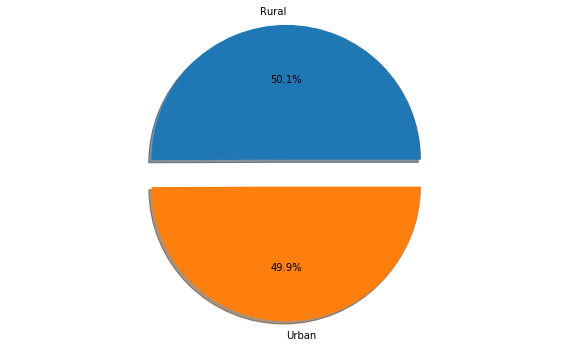

In [28]:
gen_data = mg.pivot_table('meningitis', index='settlement', aggfunc='sum')
x = gen_data.index.values
y = gen_data.values
y = y.reshape(2,)

fig, ax = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal') 
plt.show()

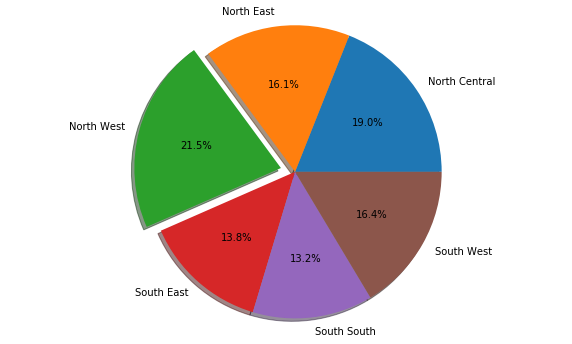

In [29]:
gen_data = mg.pivot_table('meningitis', index='Region', aggfunc='sum')
x = gen_data.index.values
y = gen_data.values
y = y.reshape(6,)

fig, ax = plt.subplots(figsize=(10, 6))
explode = (0,0,0.1,0,0,0)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal') 
plt.show()

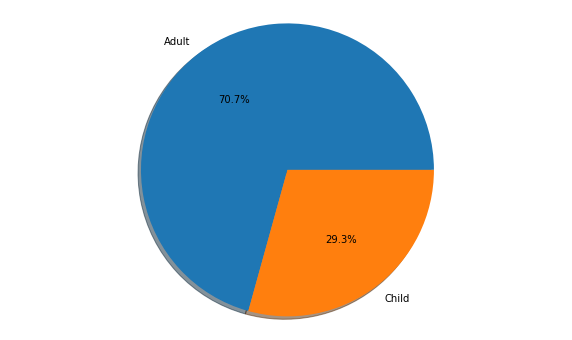

In [30]:
gen_data = mg.pivot_table('meningitis', index='child_group', aggfunc='sum')
x = gen_data.index.values
y = gen_data.values
y = y.reshape(2,)

fig, ax = plt.subplots(figsize=(10, 6))
explode = (0,0)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal') 
plt.show()

In [31]:
mg.tail()

,id,surname,firstname,middlename,sex,sex_ml,state,settlement,settlement_ml,age,child_group,meningitis,NmA,NmC,NmW,alive,confirmed,Region
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,Cross River,Rural,1,67,Adult,0,0,0,1,0,0,South South
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,Kwara,Urban,0,64,Adult,0,0,0,1,0,0,North Central
284481,288420,Isa,Deborah,Tofunmi,Female,0,Katsina,Rural,1,33,Adult,0,0,0,1,1,1,North West
284482,288421,Uba,Ismail,Akpabio,Male,1,Jigawa,Rural,1,18,Adult,0,0,0,1,0,0,North West
284483,288422,Alao,Paulina,Sade,Female,0,Kogi,Urban,0,7,Child,0,0,0,1,1,1,North Central


In [32]:
zone = pd.get_dummies(mg['Region'])
zone

,North Central,North East,North West,South East,South South,South West
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,1,0,0,0
6,0,1,0,0,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0
9,0,0,0,0,0,1


In [33]:
zone = pd.get_dummies(mg['Region'], drop_first = True)

In [34]:
child = pd.get_dummies(mg['child_group'])
child

,Adult,Child
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [35]:
child = pd.get_dummies(['child_group'], drop_first = True)

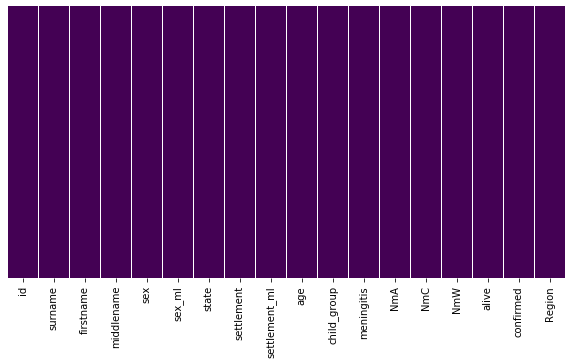

In [36]:
plt.figure(figsize = (10, 5))
sns.heatmap(mg.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [37]:
mg.drop(['Region', 'sex', 'state', 'settlement'], axis = 1, inplace = True)

In [38]:
mg.drop(['surname', 'firstname', 'middlename'], axis = 1, inplace = True)

In [39]:
mg = pd.concat([mg, zone], axis = 1)

In [40]:
mg = pd.concat([mg, child], axis = 1)

In [41]:
mg.drop('id', axis = 1, inplace = True)

In [42]:
mg.drop('child_group', axis = 1, inplace = True)

In [43]:
mg

,sex_ml,settlement_ml,age,meningitis,NmA,NmC,NmW,alive,confirmed,North East,North West,South East,South South,South West
0,0,1,32,0,0,0,0,1,1,0,0,0,1,0
1,1,1,32,0,0,0,1,1,0,0,0,1,0,0
2,0,0,24,0,0,0,1,0,0,0,0,0,0,1
3,0,1,63,0,0,0,1,1,0,0,0,0,0,1
4,1,0,9,0,0,0,1,1,0,0,0,0,0,1
5,0,1,44,0,0,0,1,1,0,0,1,0,0,0
6,0,1,61,0,0,0,1,1,1,1,0,0,0,0
7,1,1,2,0,0,0,1,1,0,0,1,0,0,0
8,1,1,54,0,0,0,1,1,0,0,1,0,0,0
9,0,0,15,0,0,0,1,1,0,0,0,0,0,1


# TRAIN TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = mg.drop('meningitis', axis = 1)
y = mg['meningitis']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# TRAINING AND PREDICTING

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
mg.dtypes

sex_ml           int64
settlement_ml    int64
age              int64
meningitis       int64
NmA              int64
NmC              int64
NmW              int64
alive            int64
confirmed        int64
North East       uint8
North West       uint8
South East       uint8
South South      uint8
South West       uint8
dtype: object

In [49]:
mg.head()

,sex_ml,settlement_ml,age,meningitis,NmA,NmC,NmW,alive,confirmed,North East,North West,South East,South South,South West
0,0,1,32,0,0,0,0,1,1,0,0,0,1,0
1,1,1,32,0,0,0,1,1,0,0,0,1,0,0
2,0,0,24,0,0,0,1,0,0,0,0,0,0,1
3,0,1,63,0,0,0,1,1,0,0,0,0,0,1
4,1,0,9,0,0,0,1,1,0,0,0,0,0,1


In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Elo-Francis Mairo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

# EVALUATION

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     76776
           1       1.00      0.50      0.67      8570

    accuracy                           0.95     85346
   macro avg       0.97      0.75      0.82     85346
weighted avg       0.95      0.95      0.94     85346



In [54]:
logmodel.score(X_test, y_test)

0.9497808918988587

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_test,predictions))

[[76776     0]
 [ 4286  4284]]


[[76776     0]
 [ 4286  4284]]


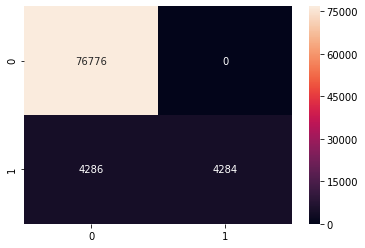

In [57]:
print(confusion_matrix(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
sns.heatmap(confusion, annot = True, fmt = 'd')